# Réseau de neurones simple avec Keras

Dans ces travaux pratiques, nous allons voir comment utiliser Keras pour construire des réseaux de neurones simples.

Il n'est pas nécessaire d'utiliser une carte graphique fournie par Colab pour ce TP, tout est rapide sur CPU. Vous pouvez donc changer d'environnement si celui qui vous a été attribué a une carte graphique (`Exécution > Modifier le type d'exécution`).

In [1]:
#!pip install keras-tuner
import datetime
import typing

import keras_tuner
import numpy
import tensorflow
import tensorflow.keras as keras

## Récupération des données

Nous allons récupérer le dataset par Keras.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## Regardons les données

Dans les cellules suivantes, étudiez comment sont stockées les données.

In [3]:
# Votre code ici
print(f"X_train type : {type(X_train)} et y_train type : {type(y_train)}")
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train type : <class 'numpy.ndarray'> et y_train type : <class 'numpy.ndarray'>
X_train shape : (60000, 28, 28)
y_train shape : (60000,)
X_test shape : (10000, 28, 28)
y_test shape : (10000,)


In [4]:
print(f"X_train dtype : {X_train.dtype} et y_train dtype : {y_train.dtype}")
print(f"X_test dtype : {X_test.dtype} et y_test dtype : {y_test.dtype}")
print(f"y_test[0] : {y_test[0]}")

X_train dtype : uint8 et y_train dtype : uint8
X_test dtype : uint8 et y_test dtype : uint8
y_test[0] : 7


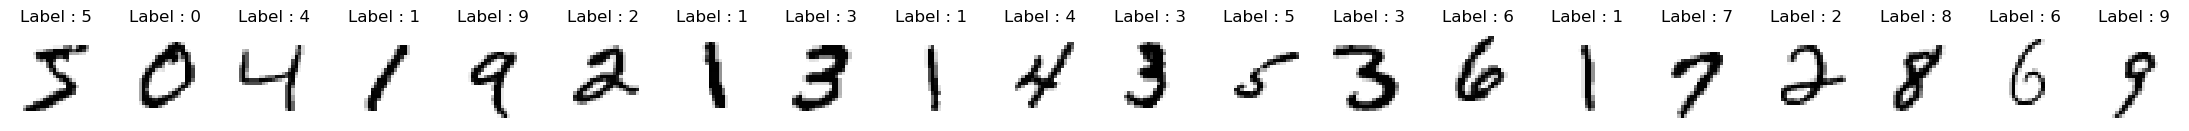

In [34]:
# displaying some data points
import matplotlib.pyplot as plt
nb_imgs_to_display = 20

fig, axes = plt.subplots(1, nb_imgs_to_display, figsize=(nb_imgs_to_display * 1.4,2))

for i in range(nb_imgs_to_display):
    axes[i].imshow(X_train[i], cmap='gray_r')
    axes[i].set_title(f"Label : {y_train[i]}")
    axes[i].axis('off')
plt.show()

### Solution

In [3]:
print(f"Format de X_train : {X_train.shape}")
print(f"Format de X_test : {X_test.shape}")
print(f"Format de y_train : {y_train.shape}")
print(f"Format de y_test : {y_test.shape}")

Format de X_train : (60000, 28, 28)
Format de X_test : (10000, 28, 28)
Format de y_train : (60000,)
Format de y_test : (10000,)


In [4]:
print(f"X_train type : {X_train.dtype}")
print(f"y_train type : {y_train[0].dtype}")
print(f"y_train exemple : {y_train[0]}")

X_train type : uint8
y_train type : uint8
y_train exemple : 5


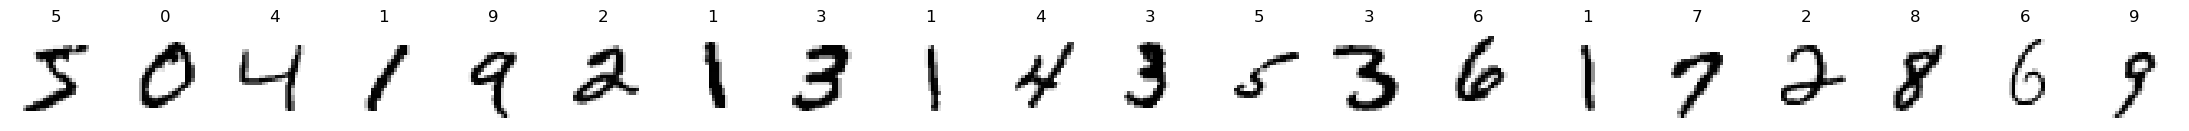

In [13]:
import matplotlib.pyplot as plt


n = 20
f, ax = plt.subplots(1, n, figsize=(n * 1.4, 2))
for i in range(n):
    ax[i].imshow(X_train[i], cmap="gray_r")
    ax[i].set_title(y_train[i])
    ax[i].axis("off")
plt.show()

## Transformation des données

Nous devons effectuer quelques transformations sur ces données :

1. On pourrait conserver les formes originales des tableaux numpy `(_, 28, 28)` mais il sera plus aisé de travailler sur des tenseurs de forme `(_, 28²)` où `_` est le nombre original d'exemples.
2. Le type actuel des tableaux est `uint8` comme nous venons de le voir. Keras utilise par défaut des `float32`. Il faut donc convertir nos tableaux.
3. Nous allons voir deux manières de définir la fonction de perte. La première nécessite que les classes soit [one-hot encodées](https://fr.wikipedia.org/wiki/Encodage_one-hot).

Quelques fonctions qui peuvent s'avérer utiles :

- [`numpy.ndarray.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)
- [`numpy.ndarray.astype`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html)
- [`tensorflow.keras.utils.to_categorical`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)

*Effectuez les deux premières transformations sur `X_train` et `X_test` et la dernière sur `y_train` et `y_test`.*

In [4]:
# Votre code ici
# flatten the images
X_train=X_train.reshape((X_train.shape[0], -1))
X_test=X_test.reshape((X_test.shape[0], -1))
# converting to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# one hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Solution

In [3]:
nb_classes = 10
input_dim = 28 * 28

# On veut mettre X « à plat » pour que l'input de notre réseau soit un vecteur
# de taille input_dim
X_train = X_train.reshape(-1, input_dim)
X_test = X_test.reshape(-1, input_dim)

# X est un numpy.ndarray de uint8. Les couches Keras attendent par défaut des
# entrées float32
X_train = X_train.astype(numpy.float32)
X_test = X_test.astype(numpy.float32)

# Conversion des classes en vecteurs sparse
Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)

In [23]:
print(f"Format de X_train : {X_train.shape}")
print(f"Format de X_test : {X_test.shape}")
print(f"Format de Y_train : {Y_train.shape}")
print(f"Format de Y_test : {Y_test.shape}")


Format de X_train : (60000, 784)
Format de X_test : (10000, 784)
Format de Y_train : (60000, 10)
Format de Y_test : (10000, 10)


In [24]:
print(f"X_train type : {X_train.dtype}")
print(f"y_train type : {Y_train[0].dtype}")
print(f"y_train exemple : {Y_train[0]}")

X_train type : float32
y_train type : float32
y_train exemple : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


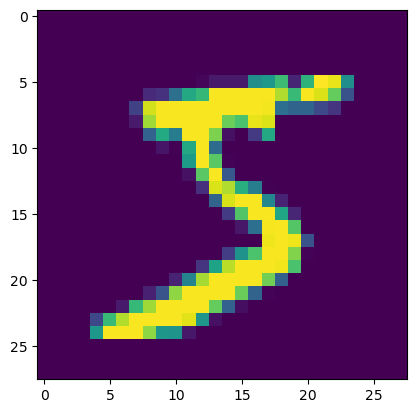

In [17]:
# Affichage d'une image
import numpy as np
from matplotlib import pyplot as plt
premiereimage = X_train[0]
premiereimage = premiereimage.reshape([28, 28])
plt.imshow(premiereimage)
plt.show ()

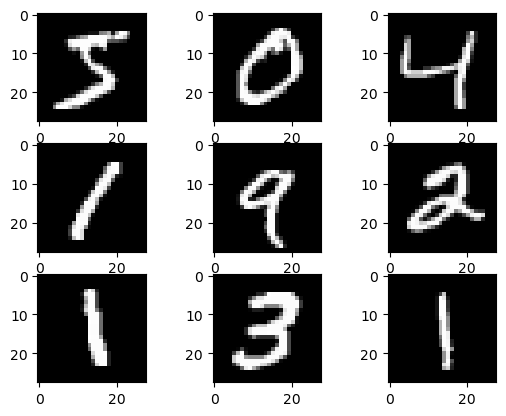

In [19]:
import matplotlib.pyplot as plt 
#plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(9):
    plt.subplot(3,3,i+1)
    theImage = X_train[i]
    theImage = theImage.reshape([28, 28])
    plt.imshow(theImage, cmap='gray', interpolation='none')

## Normalisation des données

Normalisons nos données à l'aide de [`numpy.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [`numpy.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html).


In [7]:
X_train.shape

(60000, 784)

In [8]:
# Votre code ici
# Normalisation des données
print(X_train.mean(axis=0).shape)
X_train.mean(axis=0)

(784,)


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.09999993e-03, 7.83333369e-03, 3.59999994e-03, 1.50000007e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.66666670e-04, 9.16666642e-04, 9.28333309e-03, 2.42833328e-02,
       4.37166654e-02, 6.40999973e-02, 1.20133333e-01, 1.60733327e-01,
       1.74183339e-01, 1.77433327e-01, 1.89316660e-01, 1.74150005e-01,
       1.86933339e-01, 1.53650001e-01, 1.00116670e-01, 7.12333322e-02,
       5.38166650e-02, 2.13666670e-02, 1.00833336e-02, 3.53333331e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

### Solution

In [4]:
# Normalisation
X_mean = X_train.mean(axis=0) # arithmetic mean
X_std = X_train.std(axis=0)  # standard deviation

# Il y a des colonnes constantes (des pixels toujours à 0). Pour éviter les
# divisions par zéro, on peut diviser par 1 dans ce cas
X_std[X_std == 0] = 1


def normalize(array: numpy.ndarray) -> numpy.ndarray:
  return (array - X_mean) / X_std


X_train = normalize(X_train)
X_test = normalize(X_test)

## Création d'un modèle

Créez un modèle sans couche cachée qui prend en input une image et qui essaye de prédire la classe correspondante.

Affichez un résumé de ce modèle et expliquez les nombres que vous voyez.


In [5]:
# Votre code ici
nb_classes = 10

model = keras.models.Sequential()

model.add(keras.layers.Dense(nb_classes,
                             input_dim=X_train.shape[1],
                             activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Solution

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(nb_classes,
                             input_dim=input_dim,
                             activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Apprentissage

Effectuez un apprentissage de ce modèle sur les données.

On utilisera :

- 128 comme taille de batch
- 10 itérations
- 20% de la base de train comme base de validation

In [29]:
# Votre code ici
model.compile(
              optimizer="sgd",
              loss="categorical_crossentropy",
              metrics=["accuracy"]
              )

model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.7845 - accuracy: 0.7774 - val_loss: 0.4591 - val_accuracy: 0.8783
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4352 - accuracy: 0.8798 - val_loss: 0.3854 - val_accuracy: 0.8965
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3803 - accuracy: 0.8938 - val_loss: 0.3569 - val_accuracy: 0.9034
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3529 - accuracy: 0.9007 - val_loss: 0.3407 - val_accuracy: 0.9068
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.9051 - val_loss: 0.3308 - val_accuracy: 0.9092
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.9080 - val_loss: 0.3233 - val_accuracy: 0.9116
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3166 - accuracy: 0.9115 - val_loss: 0.3182 - val_accuracy: 0.9133
Epoch 

### Solution

In [7]:
# compile sert à « attacher » un optimiseur, une fonction de perte et des
# métriques à un modèle
model.compile(optimizer="sgd",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# fit utilise le modèle « compilé » dans une boucle d'entraînement complète
model.fit(X_train,
          Y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.2)


def evaluate(model: keras.models.Model, one_hot: bool) -> None:
  score = model.evaluate(X_test, Y_test if one_hot else y_test, verbose=0)
  print(f"Perte sur le test : {score[0]}")
  print(f"Accuracy sur le test : {score[1]}")


evaluate(model, True)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.7969 - accuracy: 0.7724 - val_loss: 0.4700 - val_accuracy: 0.8721
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4397 - accuracy: 0.8756 - val_loss: 0.3941 - val_accuracy: 0.8919
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3833 - accuracy: 0.8905 - val_loss: 0.3648 - val_accuracy: 0.9011
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8980 - val_loss: 0.3482 - val_accuracy: 0.9073
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.9031 - val_loss: 0.3377 - val_accuracy: 0.9097
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.9063 - val_loss: 0.3307 - val_accuracy: 0.9106
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3183 - accuracy: 0.9090 - val_loss: 0.3250 - val_accuracy: 0.9122
Epoch 

Solution alternative qui utilise une loss permettant d'utiliser directement `y_train` plutôt que `Y_train` :

In [31]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(nb_classes,
                              input_dim=input_dim,
                              activation="softmax"))
model2.summary()

model2.compile(optimizer="sgd",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

model2.fit(X_train,
           y_train,
           batch_size=128,
           epochs=10,
           verbose=1,
           validation_split=0.2)

evaluate(model2, one_hot=False)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.7946 - accuracy: 0.7726 - val_loss: 0.4595 - val_accuracy: 0.8769
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4395 - accuracy: 0.8767 - val_loss: 0.3865 - val_accuracy: 0.8945
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3838 - accuracy: 0.8913 - val_loss: 0.3573 - val_accuracy: 0.9018
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8986 - val_loss: 0.3414 - val_accuracy: 0.9068
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.9033 - val_loss: 0.3309 - val_accuracy: 0.9091
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.9068 - val_loss: 0.3235 - val_accuracy: 0.9116
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3190 - accuracy: 0.9091 - val_loss: 0.3180 - val_accuracy: 0.9143
Epoch 

Solution avec 4 couches cachés de taille 20, une régularisation L2 des paramètres ainsi qu'une initialisation orthogonale des matrices de poids

In [8]:
def build_deep_model() -> keras.models.Model:
  hidden_params = dict(activation='relu',
                      kernel_regularizer='l2',
                      bias_regularizer="l2",
                      kernel_initializer='orthogonal')

  model = keras.models.Sequential(name="deep_model")
  model.add(keras.layers.Dense(20, **hidden_params))
  model.add(keras.layers.Dense(20, input_dim=input_dim, **hidden_params))
  model.add(keras.layers.Dense(20, **hidden_params))
  model.add(keras.layers.Dense(20, **hidden_params))
  model.add(keras.layers.Dense(nb_classes,
                               activation="softmax",
                               kernel_regularizer="l2",
                               bias_regularizer="l2",
                               kernel_initializer="orthogonal"))
  model.build((None, input_dim))
  model.summary()
  return model

In [9]:
deep_model =  build_deep_model()

deep_model.compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

deep_model.fit(X_train,
               y_train,
               batch_size=128,
               epochs=10,
               verbose=1,
               validation_split=0.2)
evaluate(deep_model, one_hot=False)

Model: "deep_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                15700     
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420       


                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
Total params: 17170 (67.07 KB)
Trainable params: 17170 (67.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 1.3874 - accuracy: 0.7908 - val_loss: 0.8912 - val_accuracy: 0.9222
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.8435 - accuracy: 0.9250 - val_loss: 0.7825 - val_accuracy: 0.9358
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.7726 - accuracy: 0.9336 - val_loss: 0.7446 - val_accuracy: 0.9377
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.7387 - accuracy: 0.9357 - val_loss: 0.7223 - val_accuracy: 0.9399
Epoch 5/10
375/375 [==============================] - 1s 3ms/step 

## Recherche d'hyper-paramètres

Pour trouver les hyper-paramètres optimaux, il est possible d'utiliser la librairie [`keras-tuner`](https://keras-team.github.io/keras-tuner/). Pour cela, il faut définir une fonction qui crée un modèle en échantillonant les paramètres. Référez-vous à l'exemple de la page d'accueil de Keras Tuner pour définir un modèle utilisable par Keras Tuner puis utilisez [le tuner basé sur les processus bayésiens](https://keras-team.github.io/keras-tuner/documentation/tuners/#bayesianoptimization-class) pour trouver les hyper-paramètres optimaux de votre modèle.

In [43]:
# Votre code ici

### Solution

In [10]:
def build_model(hp: keras_tuner.HyperParameters):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(input_dim=input_dim,
                               units=hp.Int('units',
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
  model.add(keras.layers.Dense(nb_classes, activation='softmax'))
  model.compile(
      optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',
                                      values=[1e-2, 1e-3, 1e-4])),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
  return model


now = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

tuner = keras_tuner.RandomSearch(
  build_model,
  objective="val_accuracy",
  max_trials=5,
  executions_per_trial=3,
  directory=f"logs/hp-{now}",
  project_name="mnist")

tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [11]:
tuner.search(X_train, y_train,
             epochs=10,
             batch_size=1500,
             validation_split=0.2)

Trial 5 Complete [00h 00m 22s]
val_accuracy: 0.9705833395322164

Best val_accuracy So Far: 0.9725277821222941
Total elapsed time: 00h 02m 06s


In [12]:
tuner.results_summary()
best_models = tuner.get_best_models()
print(best_models[0].summary())

Results summary
Results in logs/hp-2024-02-13-09-30-53\mnist
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
units: 320
learning_rate: 0.01
Score: 0.9725277821222941

Trial 3 summary
Hyperparameters:
units: 416
learning_rate: 0.01
Score: 0.9708888928095499

Trial 4 summary
Hyperparameters:
units: 288
learning_rate: 0.01
Score: 0.9705833395322164

Trial 0 summary
Hyperparameters:
units: 256
learning_rate: 0.001
Score: 0.9686944484710693

Trial 1 summary
Hyperparameters:
units: 384
learning_rate: 0.0001
Score: 0.9338888923327128
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 320)               251200    
                                                                 
 dense_1 (Dense)             (None, 10)                3210      
                                                            

## Utilisation de TensorBoard pour la visualisation de métriques

Passer un callback [`tensorflow.keras.callbacks.TensorBoard`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) à `fit` dans son argument `callbacks` permet d'activer TensorBoard. On peut ensuite visualiser les entraînements directement dans Colab à l'aide de l'extension `tensorboard`.

In [13]:
now = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

deep_model = build_deep_model()

deep_model.compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

tb_callback = keras.callbacks.TensorBoard(log_dir=f"logs/adam-{now}")

deep_model.fit(X_train, y_train, batch_size=3000, epochs=10,
               callbacks=[tb_callback], validation_split=0.2)


# Même modèle mais avec sgd comme optimiseur
deep_model = build_deep_model()

deep_model.compile(optimizer="sgd",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

tb_callback = keras.callbacks.TensorBoard(log_dir=f"logs/sgd-{now}")

deep_model.fit(X_train, y_train, batch_size=3000, epochs=10,
               callbacks=[tb_callback], validation_split=0.2)

%reload_ext tensorboard
%tensorboard --logdir logs

Model: "deep_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                15700     
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
Total params: 17170 (67.07 KB)
Trainable params: 17170 (67.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
16/16 [==